# walkthrough of bivariate copula (bicop) dataclasses and factory methods.

- Most workflow

the function `tvc.bicop.vcp_from_obs` takes bicop observations (of shape $(n,2)$ and values inside $(0,1)$), to fit every family (and implied rotations) in `tpl_fam`, using fit methods (default `'itau'`), and select the best bicop model using selection criteria (default `'aic'`), then returns an object of data class `DataBiCop`.

the data class `DataBiCop` stores fitted parameters and other outcomes, and can call functions (static methods) from corresponding families.

- A bit extra

Each bicop family class has static methods including `cdf_0`, `pdf_0`, `hfunc1_0`, `hinv1_0`, `l_pdf_0`, `par2tau_0`, `tau2par_0` and inherited their rotated versions from `BiCopAbstract`.


In [1]:
import matplotlib.pyplot as plt
import torch

import torchvinecopulib as tvc

print(f"cuda (GPU) avail? {torch.cuda.is_available()}\n")
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
for _ in tvc.bicop.__all__:
    print(f"\n{_}")
    print(tvc.bicop.__getattribute__(_).__doc__)

print(f"\nbicop fam avail: {tvc.bicop.ENUM_FAM_BICOP._member_names_}")

cuda (GPU) avail? True


DataBiCop
Dataclass for a bivariate copula.

    The default BiCopData is an Independent BiCop.

    num_obs = 1 by default, to avoid nan for bic.
    Can modify num_obs during instantiation, for accurate bic calculation
    

bcp_from_obs
factory method to make a bivariate copula dataclass object, fitted from observations

    :param obs_bcp: bivariate copula obs, of shape (num_obs, 2) with values in [0, 1]
    :type obs_bcp: torch.Tensor
    :param tau: Kendall's tau of the observations, defaults to None for the function to estimate
    :type tau: float, optional
    :param mtd_fit: parameter estimation method, either 'itau' (inverse of tau) or 'mle' (maximum likelihood estimation); defaults to "itau"
    :type mtd_fit: str, optional
    :param mtd_mle: optimization method for mle as used by scipy.optimize.minimize, defaults to "COBYLA"
    :type mtd_mle: str, optional
    :param mtd_sel: model selection criterion, either 'aic' or 'bic'; defaults to "aic"
   

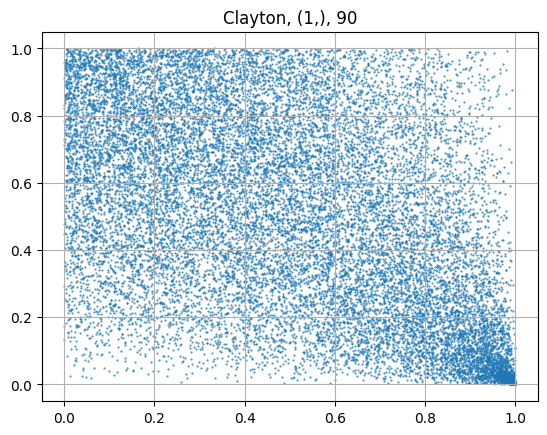

In [2]:
# simulate from a bcp with given family, parameter, rotation
fam, par, rot = "Clayton", (1,), 90
V_bcp = tvc.bicop.DataBiCop(fam=fam, par=par, rot=rot).sim(
    num_sim=20000, device=DEVICE, seed=0
)
# visualization
plt.scatter(*V_bcp.T.cpu(), s=0.3, alpha=0.8)
plt.title(f"{fam}, {par}, {rot}")
plt.grid()

factory function


DataBiCop(fam='Clayton', negloglik=-3875.6661053166463, num_obs=20000, par=(0.9905005588627828,), rot=90)

{'fam': 'Clayton',
 'rot': 90,
 'tau': -0.3312,
 'par': (0.9905,),
 'num_obs': 20_000,
 'negloglik': -3875.6661,
 'aic': -7749.3322,
 'bic': -7741.4287}


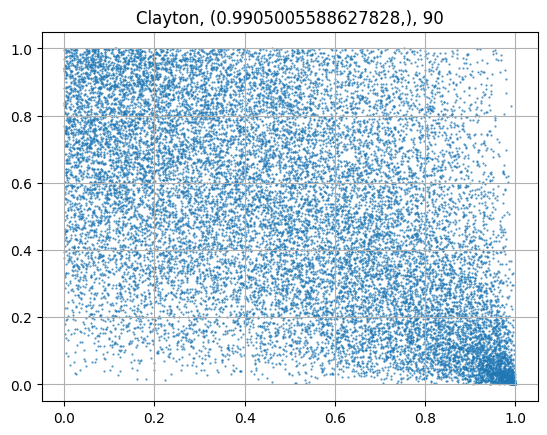

In [3]:
# make a DataBiCop object (from fitting the bicop obs);
mdl_bcp = tvc.bicop.bcp_from_obs(V_bcp)
display(mdl_bcp)
print(mdl_bcp)
# use the fitted model to simulation;
V_bcp = mdl_bcp.sim(num_sim=20000, device=DEVICE, seed=1)
# visualization
plt.scatter(*V_bcp.T.cpu(), s=0.3, alpha=0.8)
plt.title(f"{mdl_bcp.fam}, {mdl_bcp.par}, {mdl_bcp.rot}")
plt.grid()

dataclass: "cdf", "hfunc1", "hfunc2", "hinv1", "hinv2", "l_pdf"


In [4]:
for _ in ("cdf", "hfunc1", "hfunc2", "hinv1", "hinv2", "l_pdf"):
    print(f"{_}\t{mdl_bcp.__getattribute__(_)(V_bcp)}")

cdf	tensor([[0.0455],
        [0.4374],
        [0.3756],
        ...,
        [0.3304],
        [0.1333],
        [0.3006]], device='cuda:0', dtype=torch.float64)
hfunc1	tensor([[0.2598],
        [0.8629],
        [0.8907],
        ...,
        [0.8954],
        [0.3848],
        [0.6926]], device='cuda:0', dtype=torch.float64)
hfunc2	tensor([[0.7061],
        [0.7599],
        [0.6567],
        ...,
        [0.5896],
        [0.4849],
        [0.6663]], device='cuda:0', dtype=torch.float64)
hinv1	tensor([[0.0461],
        [0.8466],
        [0.9153],
        ...,
        [0.9323],
        [0.5429],
        [0.7241]], device='cuda:0', dtype=torch.float64)
hinv2	tensor([[0.9546],
        [0.3662],
        [0.2722],
        ...,
        [0.2292],
        [0.4300],
        [0.3762]], device='cuda:0', dtype=torch.float64)
l_pdf	tensor([[ 1.0438],
        [-0.0122],
        [ 0.1417],
        ...,
        [ 0.2226],
        [ 0.1574],
        [ 0.1184]], device='cuda:0', dtype=torch.float64